# SATANN Synthetic Experiment Plan

In this notebook, we'll detail the experiments we plan to run using SATANN, with increasing degrees of difficulty, to help us better understand the impact of the relational loss and the capabilities of the baseline.

To that end, we will be using the Cloud of Structured Objects database (with the FASHION-MNIST as base) in different settings.

In [1]:
from datasets.clostob.clostob_dataset import CloStObDataset

import numpy as np
import matplotlib.pyplot as plt
from skimage.segmentation import find_boundaries

In [2]:
def show_dataset(dataset):
    plt.figure(figsize=[20,20])
    for i in range(25):
        plt.subplot(5,5,i+1)

        plt.imshow(dataset[i]["image"], cmap="gray")

        for label, color in zip([1,2,3],[(1,0,0,1),(0,1,0,1),(0,0,1,1)]):
            boundaries = find_boundaries(dataset[i]["labelmap"] == label)
            boundaries_image = np.zeros((*dataset[i]["image"].shape,4))
            boundaries_image[boundaries == True,:] = color
            plt.imshow(boundaries_image)

        plt.axis("off")
    plt.show()

## Foreground for all experiments

We will use as foreground a right-aligned right triangle with 3 distinct classes: shirts (0) on the left, pants (1) on the bottom right and bags (8) on the top right.

In [3]:
# Preparing the foreground
fg_classes = [0, 1, 8]
fg_positions = [(0.65, 0.3), (0.65, 0.7), (0.35, 0.7)]
position_translation=0.2
position_noise=0.1

# Also setting the image dimensions in advance
image_dimensions = [256, 256]

## Experiment 1: Easy Background
For Experiment 1, we will simply use images where the background elements do not belong to any of the foreground classes.

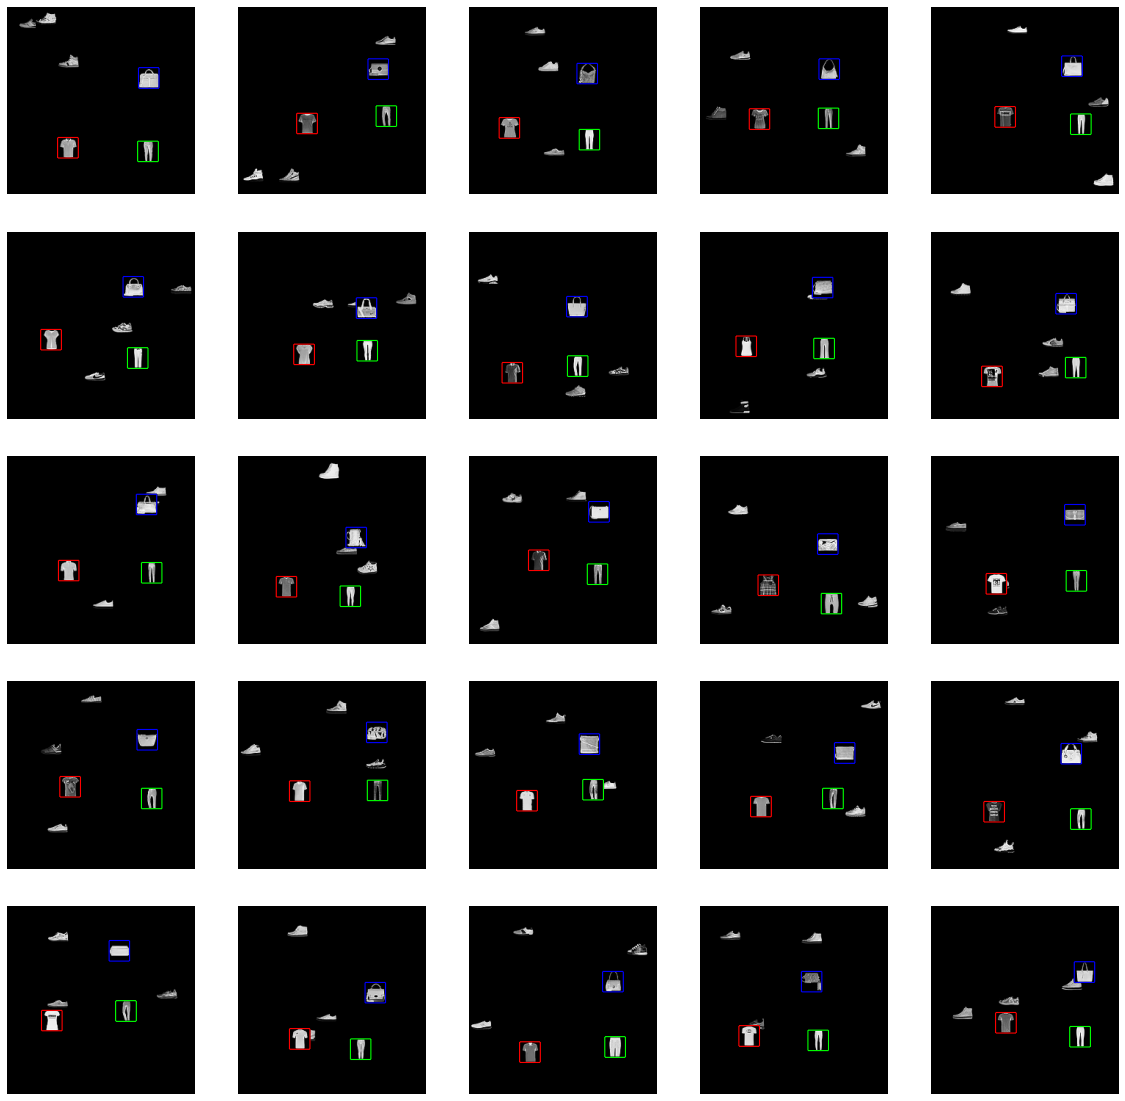

In [4]:
# Easy background examples
easy_bg_dataset = CloStObDataset(base_dataset_name="fashion",
                          image_dimensions=image_dimensions,
                          size=25,
                          fg_classes=fg_classes,
                          fg_positions=fg_positions,
                          position_translation=position_translation,
                          position_noise=position_noise,
                          bg_classes=[7], # Background class is 7 - Sneaker 
                          bg_amount=3)
show_dataset(easy_bg_dataset)

## Experiment 2: Hard background

For Experiment 2, we will use images where the background elements belong in one of the foreground classes, thus rendering it more difficult to learn the proper foreground without using the overall foreground structure.

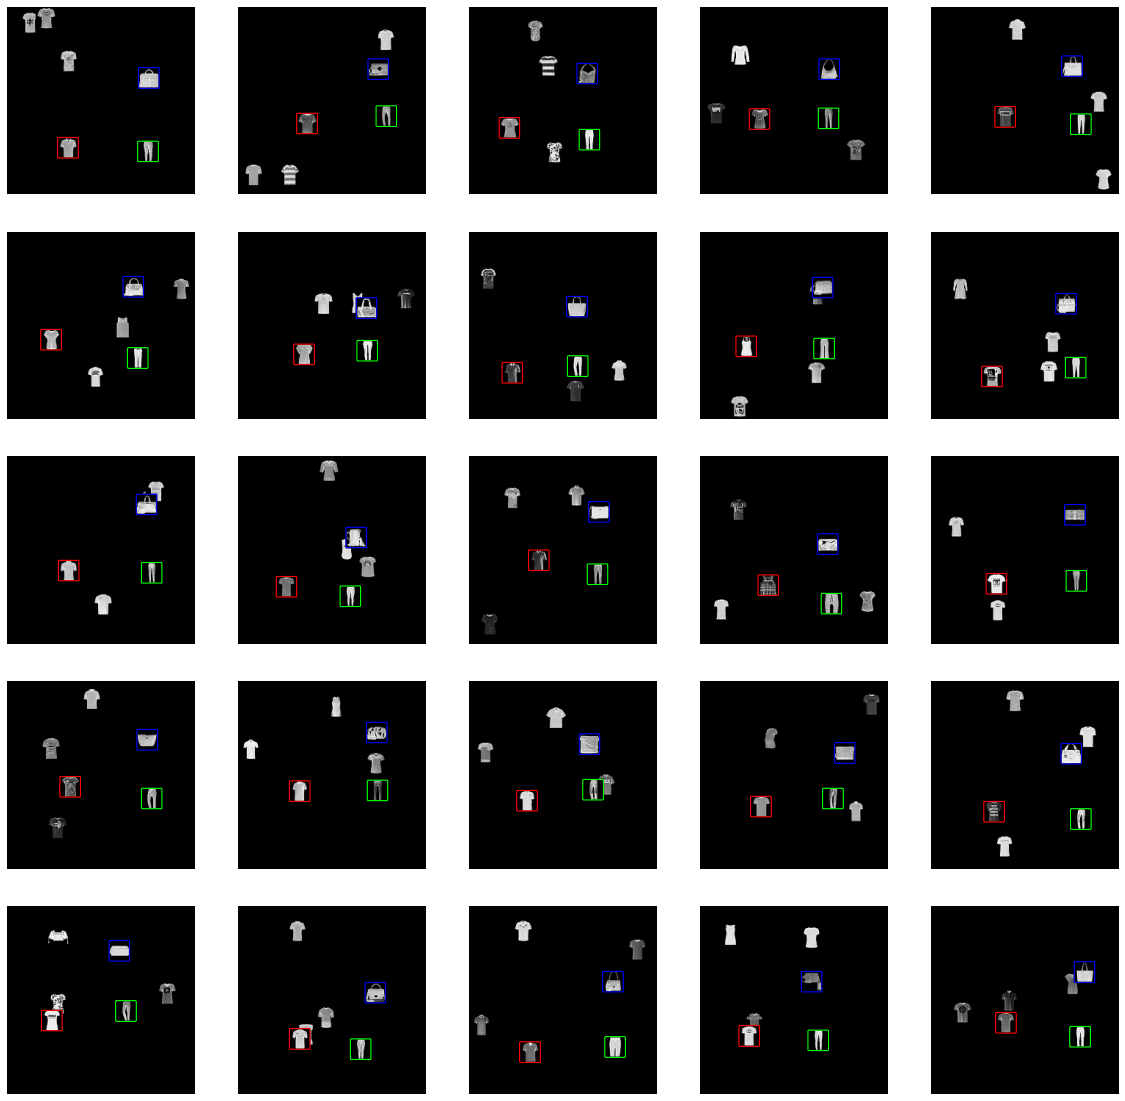

In [5]:
# Hard background examples
hard_bg_dataset = CloStObDataset(base_dataset_name="fashion",
                          image_dimensions=image_dimensions,
                          size=25,
                          fg_classes=fg_classes,
                          fg_positions=fg_positions,
                          position_translation=position_translation,
                          position_noise=position_noise,
                          bg_classes=[0], # Background class is 0 - shirt
                          bg_amount=3)
show_dataset(hard_bg_dataset)

## Experiment 3: Hard foreground
For Experiment 3, we will use images with hard background and additional transformations applied to foreground images: resizing, occlusion, and deformation.

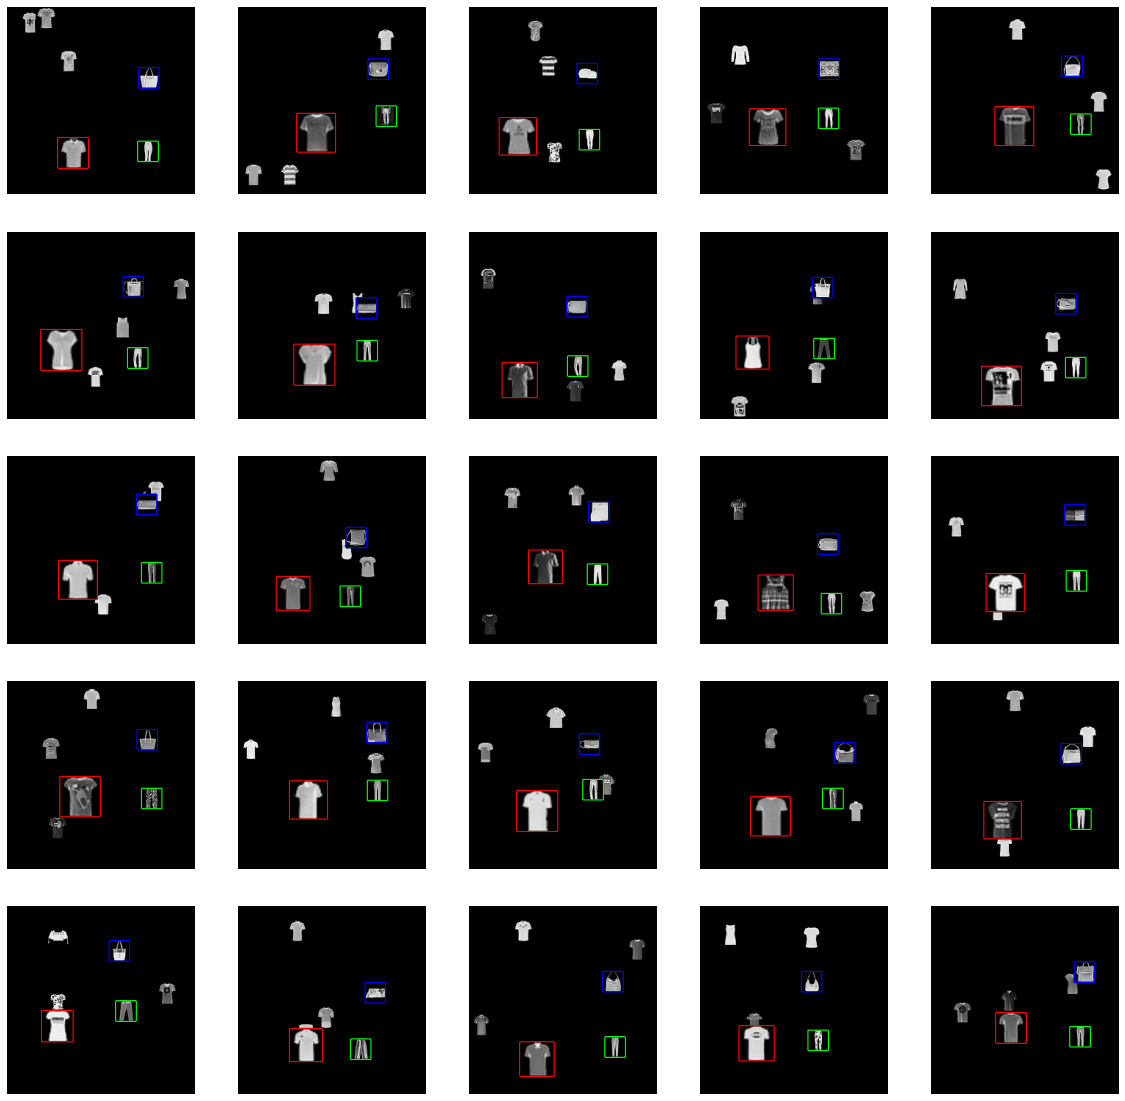

In [6]:
# Hard foreground examples - resizing
hard_fg_resize_dataset = CloStObDataset(base_dataset_name="fashion",
                          image_dimensions=image_dimensions,
                          size=25,
                          fg_classes=fg_classes,
                          fg_positions=fg_positions,
                          position_translation=position_translation,
                          position_noise=position_noise,
                          rescale_classes=[0],
                          rescale_range=(1.5,2.0),
                          bg_classes=[0], # Background class is 0 - shirt
                          bg_amount=3)
show_dataset(hard_fg_resize_dataset)

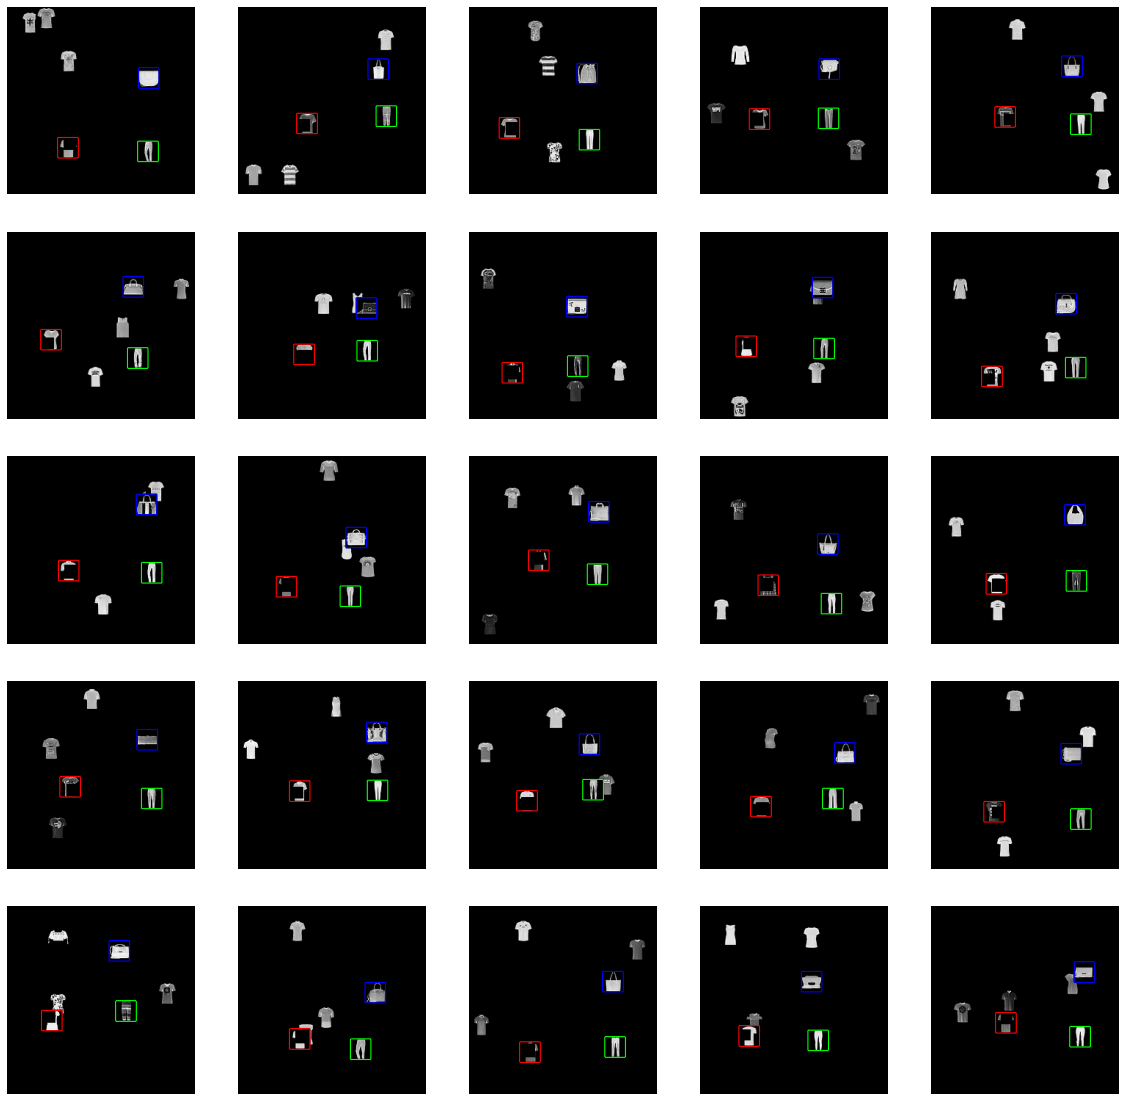

In [10]:
# Hard foreground examples - occlusion
hard_fg_occlusion_dataset = CloStObDataset(base_dataset_name="fashion",
                          image_dimensions=image_dimensions,
                          size=25,
                          fg_classes=fg_classes,
                          fg_positions=fg_positions,
                          position_translation=position_translation,
                          position_noise=position_noise,
                          occlusion_classes=[0],
                          occlusion_range=(15,20),
                          bg_classes=[0], # Background class is 0 - shirt
                          bg_amount=3)
show_dataset(hard_fg_occlusion_dataset)